In [23]:
import pandas as pd

In [24]:
train = pd.read_csv("train.csv")

In [25]:
train['label_2'].fillna(train['label_2'].mean(), inplace=True)

In [26]:
train['label_2'] = train['label_2'].astype(int)

In [27]:
train.dropna(subset=['label_4'], inplace=True)

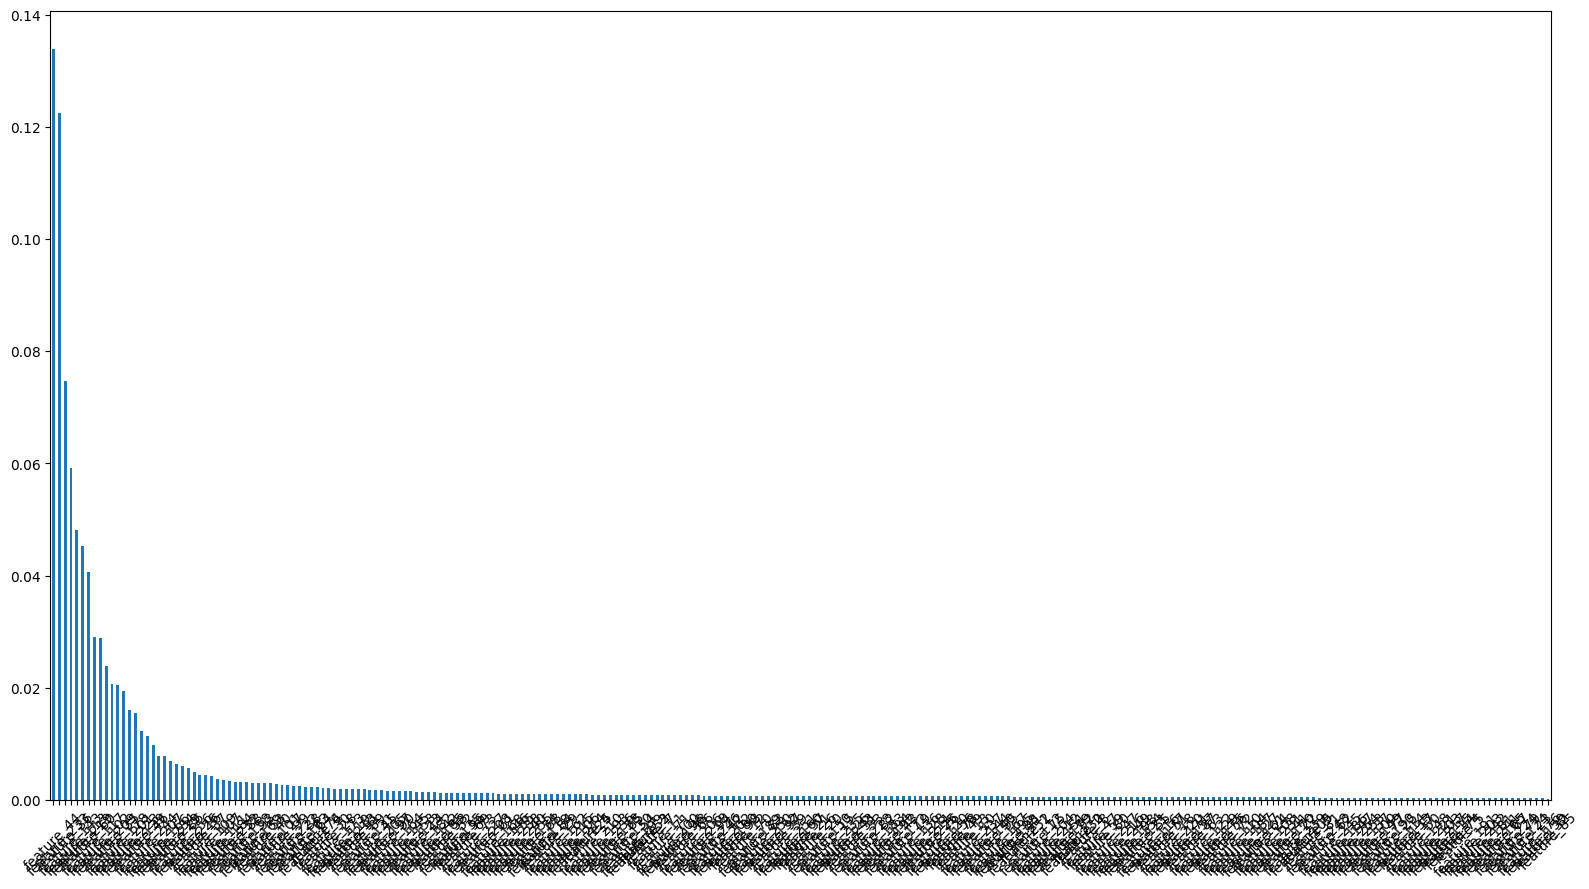

In [16]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

X = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y = train['label_3']

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()


In [17]:
importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

threshold = 0.005

selected_features = f_importances[f_importances > threshold]

X_selected = X[selected_features.index]

In [35]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
def separate_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = svm.SVC(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    print(f"Training score: {model.score(X_train, y_train)}")
    print(f"Testing score: {model.score(X_test, y_test)}")

def evaluate_model_detailed(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [37]:
X_train, X_test, y_train, y_test = separate_dataset(X_selected, y)

In [38]:
model3 = train_model(X_train, y_train)

In [39]:
evaluate_model(model3, X_train, X_test, y_train, y_test)

Training score: 0.996393508314967
Testing score: 0.9954417952314165


In [40]:
evaluate_model_detailed(model3, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1718
           1       1.00      1.00      1.00      6838

    accuracy                           1.00      8556
   macro avg       0.99      0.99      0.99      8556
weighted avg       1.00      1.00      1.00      8556

Confusion Matrix:
[[1696   22]
 [  17 6821]]


In [50]:
test = pd.read_csv("test.csv")

In [51]:
test = test[test.columns.difference(['label_1', 'label_2', 'label_3', 'label_4'])]

In [52]:
test = test[selected_features.index]

In [53]:
test['label_3'] = model3.predict(test)

In [54]:
test.head()

feature_44  feature_233  feature_36  feature_143  feature_113  feature_219  \
0   -2.880708    -0.037238    1.681010     0.188330    -3.009861    -0.703973   
1   -1.843359     0.471878    3.269116     1.994243    -2.233244     1.328859   
2   -2.667108     0.470122    3.436413     1.326968    -2.454773     0.270569   
3   -2.529230     1.719265    3.524469     2.231530    -1.397477    -0.974388   
4   -1.740185     1.012408    1.471479     2.367822    -2.282817    -0.261385   

   feature_60  feature_117  feature_102  feature_209  ...  feature_46  \
0   -0.822714    -0.446570    -0.115635     1.508700  ...    0.699177   
1   -1.472787     1.738091     1.450816     1.382733  ...   -1.730403   
2   -1.451073     0.810390     1.586289     1.817716  ...   -0.782798   
3   -0.540404     0.066740     2.889847     2.110729  ...   -0.231711   
4    0.002882    -0.789587     0.240543     0.755497  ...   -0.354222   

   feature_244  feature_207  feature_166  feature_234  feature_229  \
0     2.971232     0.229153    -0.341535     0.954666    -0.452329   
1     1.598861    -0.266165    -2.241760     1.752095     2.890294   
2     0.855148     0.243109    -1.999258     2.126596     0.560607   
3     1.400525     1.315077    -2.660089    -0.607204     0.154782   
4     3.686254    -0.547164    -1.364575    -1.058827     1.123009   

   feature_86  feature_256  feature_226  label_3  
0   -2.631935    -0.615575    -0.245036        1  
1    1.312973    -1.570136    -2.738221        1  
2    0.154647    -2.164104    -1.363410        1  
3    1.461313    -1.389013    -1.658041        1  
4   -0.142624    -1.735939    -1.530329        1  

[5 rows x 25 columns]

In [55]:
test.to_csv('test_with_predictions_label3.csv', index=False)